# Lab 06 (Mathematics and Programming for AI)
## A simple neural network! 

A single layer neural network with three nodes in the inputr layer and one node as the output layer

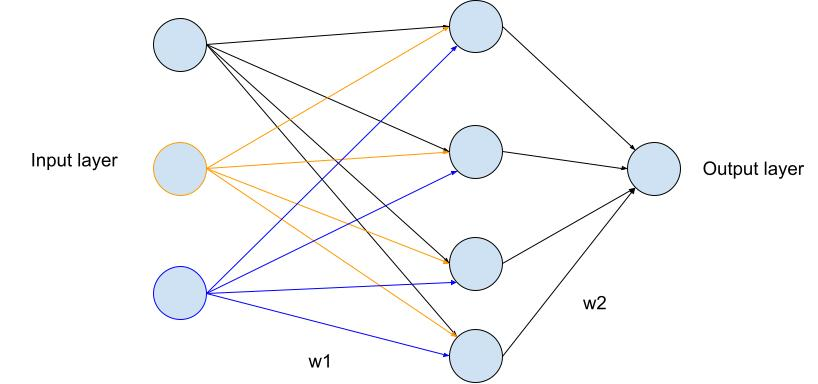

## backpropagation 

Lets see the simplified view of the network, where each layer is represneted by one neuron. We have two weight matrices, and we want to find derivatives with respect to the loss for each weight. Derivative of one is shown in the figure

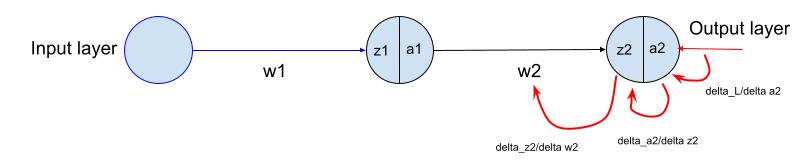

$ \frac{\partial L}{\partial w2} = \frac{\partial L}{\partial a_2} \ \frac {\partial a_2}{\partial z_2} \frac{\partial z_2}{ \partial w_2}$ <br>

$ \frac{\partial L}{\partial a_2}  $ is the derivative of loss. if loss is $ \frac{1}{2}(y - a2)^2 $, then the derivative of loss is $ y - a2 $ <br>

$ \frac{\partial a_2}{\partial z_2} $ is the loss of activation, in this case sigmoid which is $a_2 \ (1-a_2 )$ <br>

$ \frac{\partial z_2}{\partial w_2} $ derivative of z_2 w.r.t $ w_2 $. <br>
<br>
In this case $ z_2 = a_1.w_2  $ so the derivative will be $ a_1 $


 



In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Lets write the code for NN

- X = 3-dimensional input
- y = labels
- w0, w1 = weight matrices 
- sigmoid activation 
- $ \frac{\partial}{\partial(x) } \sigma = \sigma(x) .(1 - \sigma(x))   $


In [14]:
# just 4 samples
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1],[1,1,0] ])

# target values 
y = np.array([[0,1,1,0,1]]).T
# weight matrix input layer
w1 = 2*np.random.random((3,4)) - 1
# weigh matrix first layer 
w2 = 2*np.random.random((4,1)) -1 
n_epochs = 60000

for j in range(n_epochs):

    # activations of layers 1, w1 is weight matrix of input layer
    z1 = ...
    # sigmoid here
    a1 = ...
    
    # activations of layers 2, w2 is weight matrix and a1 is input to this layer
    z2 = ...
    a2 = ...

    # calculating derivative 
    # a2 -y is the derivative of the loss 
    # a2 * (1 - a2) derivative of the sogmoid
    a2_delta = (a2-y) * (a2*(1-a2))
    
    
    # derivaitve layer1 
    # we are re-using a2_delta 
    
    a1_delta = a2_delta.dot(w2.T) * (a1 * (1-a1))
    
    w2 -= a1.T.dot(a2_delta)

    w1 -= X.T.dot(a1_delta)

### Training completed

### Lets explore the dimensions

In [9]:
print ("shape of w1 {}".format(w1.shape))
print ("shape of w2 {}".format(w2.shape))

print ("shape of layer1 activation {}".format(a1.shape))
print ("shape of output layer  {}".format(a2.shape))

print ("shape of output layer error (a2_delta) {}".format(a2_delta.shape))
print ("shape of a1 derivative  {}".format(a1_delta.shape))

shape of w1 (3, 4)
shape of w2 (4, 1)
shape of layer1 activation (5, 4)
shape of output layer  (5, 1)
shape of output layer error (a2_delta) (5, 1)
shape of a1 derivative  (5, 4)


In [10]:
print ("shape of X {}".format(X.shape))
print ("shape of y {}".format(y.shape))

shape of X (5, 3)
shape of y (5, 1)


## Some calculus about the dimensions/shapes

**Dimensions only** <br>
$ l1 = x \times w0 $ would be <br>
$ [5 , 3] \times [3 ,4]  = [5 ,4 ] $ <br>

$ l2 = l1 \times w1 $ would be <br>
$ [5 , 4] \times [4 ,1]  = [5 ,1 ] $ <br>





## Lets visualize dimension on NN 

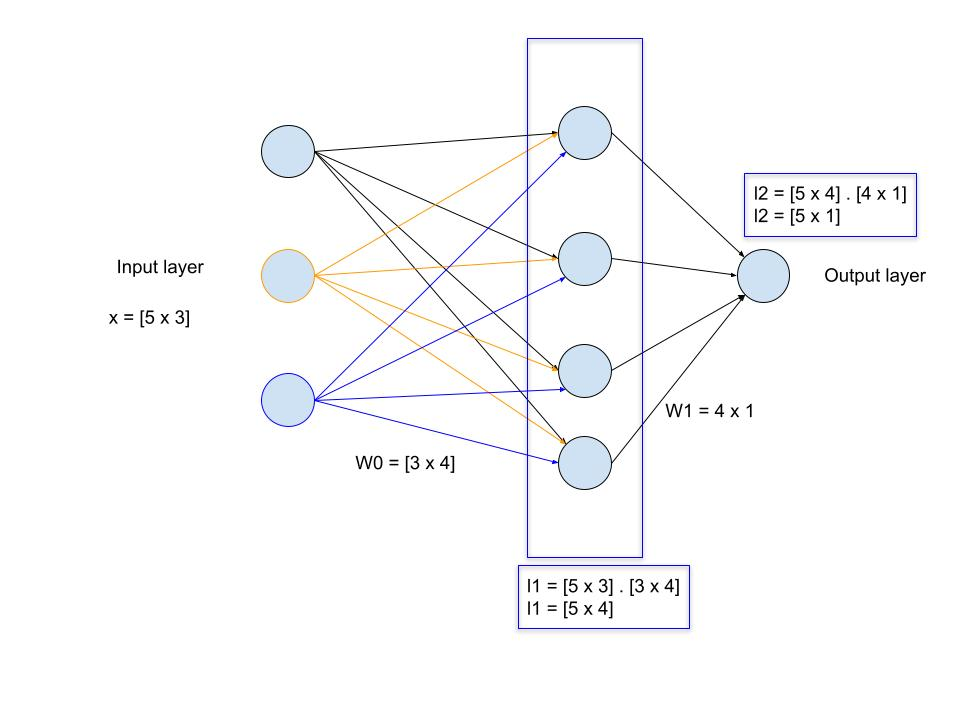

## Lets plot the activations 

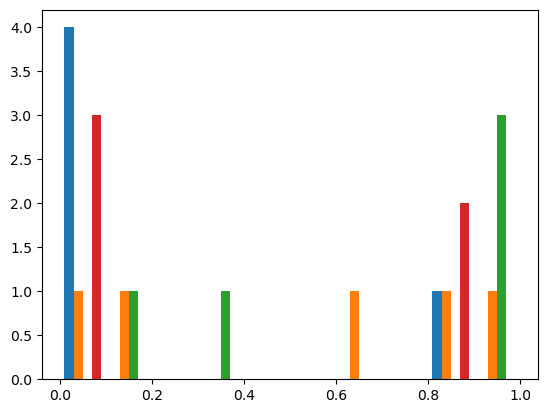

In [11]:

plt.hist(a1)
plt.show()

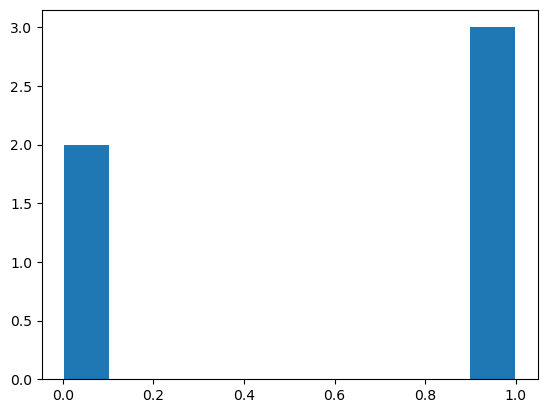

In [15]:

plt.hist(a2)
plt.show()

### is this histogram as you expected? 

In [16]:
a2

array([[0.00348251],
       [0.9964909 ],
       [0.99596962],
       [0.00391451],
       [0.99911429]])

## Example 2 
Training on synthetic data 


In [8]:
def plot_3D(elev=-90, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:,2], c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

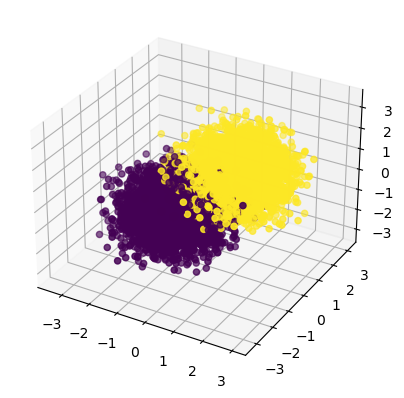

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X, y = make_blobs( n_samples=10000, n_features=3, centers=((1, 1,1), (5, 5,5)), cluster_std = 2)

X = StandardScaler().fit_transform(X)
ax = plt.subplot(projection='3d')
ax.scatter3D( X[:,0], X[:,1], X[:,2], c=y)

y = np.reshape(y,(-1,1))

In [10]:
from ipywidgets import interact, fixed
interact(plot_3D, elev=(-90, 90), azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(IntSlider(value=-90, description='elev', max=90, min=-90), IntSlider(value=30, descripti…

In [9]:
y.shape

(5000, 1)

### train the data on NN 

In [11]:


# weight matrix input layer
w1 = 2*np.random.random((3,4)) - 1

# weigh matrix first layer 
w2 = 2*np.random.random((4,1)) -1 

n_epochs = 700
lr = 0.0001

for j in range(n_epochs):

    # activations of layers 1 and output layer
    # implement sigmoid here using X as input and w1 as weight matrix 
    a1 = ...
    
    # implement sigmoid here using a1 as input and w2 as weight matrix 

    a2 = ...

    # calculating derivative 
    #  a2 -y is the derivative of the loss 
    # a2 * (1 - a2) derivative of the sogmoid
    a2_delta = ...
    
    # derivaitve layer1 
    # we are re-using a2_delta 
    
    a1_delta = ...
    
    # update weights taking into account lr
    w2 -= ...

    w1 -= ...

In [12]:
a2[a2 >0.5]=1
a2[a2<0.5] =0

### Acuracy 

In [13]:
sum(a2==y)/len(y)

array([0.9584])

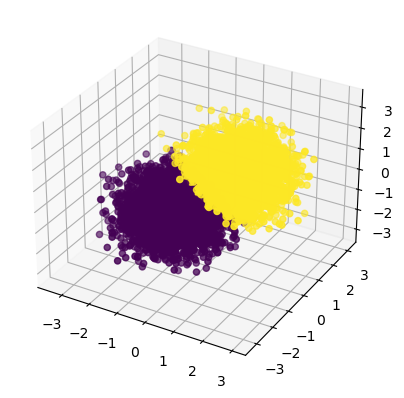

In [14]:
ax = plt.subplot(projection='3d')
ax.scatter3D( X[:,0], X[:,1], X[:,2], c=a2)

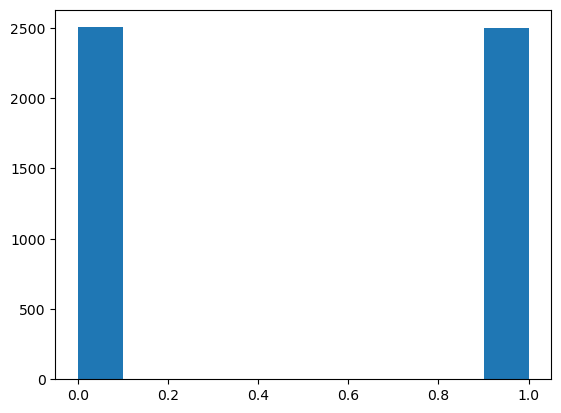

In [11]:
plt.hist(a2)
plt.show()

In [15]:
def ReLU_derivative(x):
    ...

In [16]:
# weight matrix input layer
w1 = 2*np.random.random((3,4)) - 1

# weigh matrix first layer 
w2 = 2*np.random.random((4,1)) -1 

n_epochs = 1000
lr = 0.0001

for j in range(n_epochs):

    # activations of layers 1 and output layer
    
    a1 = ...
    
    a2 = ...

    # calculating derivative 
    # y - a2 is the derivative of the loss 
    # a2 * (1 - a2) derivative of the sogmoid
    
    a2_delta = ...
    
    
    # derivaitve layer1 
    # we are re-using a2_delta 
    
    a1_delta = ...
    
    w2 -= ...

    w1 -= ...

In [17]:
a2[a2 >0.5]=1
a2[a2<0.5] =0

In [18]:
sum(a2==y)/len(y)

array([0.8483])